# Preposesamiento de Datos

In [1]:
!pip install nltk

In [2]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=c4707befe0cb64eb9c413e8965f35dfcb6548d6ffcef3b38e65d3e6b82a722a5
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import make_scorer, f1_score
import seaborn as sns

df_criticas = pd.read_csv("./train.csv",encoding='utf-8')
df = df_criticas.copy()
df.head(10)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
5,5,Probablemente mi película favorita de todos lo...,positivo
6,6,Seguro que me gustaría ver una resurrección de...,positivo
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo
8,8,Alentados por los comentarios positivos sobre ...,negativo
9,9,"Si te gusta la risa original desgarradora, te ...",positivo


Text(0.5, 1.0, 'Porcentaje en sentimiento')

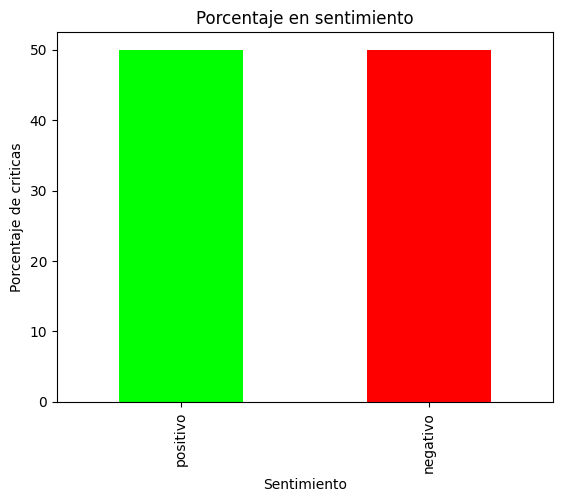

In [4]:
df_porcentaje = df['sentimiento'].value_counts(normalize=True)*100

df_porcentaje.plot(kind='bar',color=[(0,1,0),(1,0,0)])
plt.ylabel("Porcentaje de criticas")
plt.xlabel("Sentimiento")
plt.title("Porcentaje en sentimiento")

Los datos del target 'sentimiento' estan balanceados

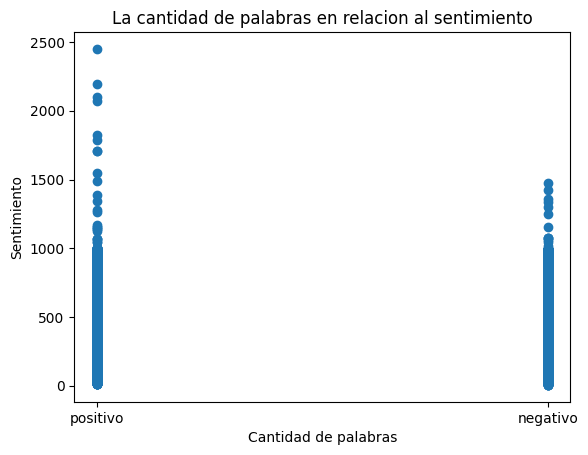

In [5]:
df['num_palabras'] = df['review_es'].str.split().apply(len)
plt.scatter(df['sentimiento'], df['num_palabras'])
plt.xlabel('Cantidad de palabras')
plt.ylabel('Sentimiento')
plt.title('La cantidad de palabras en relacion al sentimiento')
plt.show()

Podria llegar a tener una relacion el sentimiento con la cantidad de palabras que posee una review

In [6]:
from langdetect import detect

indices = []

for i, fila in df.iterrows():
    review = fila['review_es']
    if detect(review) != 'es':
        indices.append(i)

df.iloc[indices]

,ID,review_es,sentimiento,num_palabras
156,156,From the film's first shot - Keira Knightley a...,negativo,832
249,249,'Airport 4' is basically a slopped together me...,negativo,115
250,250,"Supposedly a ""social commentary"" on racism and...",negativo,124
263,263,"There is a difference between a ""film,"" and a ...",negativo,906
264,264,please re-watch all 3 series and do not go see...,negativo,120
...,...,...,...,...
49772,49772,CitizenX(1995) is the developing world's answe...,positivo,961
49792,49792,"Thirty years after its initial release, the th...",positivo,861
49833,49833,THE SHOP AROUND THE CORNER is one of the sweet...,positivo,1138
49861,49861,"OK OK, it might be hard to put the entirety of...",negativo,954


In [ ]:
df.drop(indices,inplace= True)

Buscamos las reviews que aparecen en ingles y las eliminamos

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('punkt')

stemmer = SnowballStemmer('spanish')

def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

df['review_es'] = df['review_es'].apply(stem_sentence)
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,ID,review_es,sentimiento,num_palabras
0,0,uno de los otros critic ha mencion que despues...,positivo,345
1,1,una pequeñ pequeñ produccion.l tecnic de filma...,positivo,161
2,2,pens que esta era una maner maravill de pas ti...,positivo,173
3,3,"basic , hay una famili dond un niñ pequeñ ( ja...",negativo,137
4,4,el `` amor en el tiemp '' de pett mattei es un...,positivo,237
5,5,"probabl mi pelicul favorit de tod los tiemp , ...",positivo,123
6,6,segur que me gust ver una resurreccion de una ...,positivo,157
7,7,"este espectacul fue una ide increibl , fresc e...",negativo,168
8,8,alent por los comentari posit sobr esta pelicu...,negativo,120
9,9,"si te gust la ris original desgarr , te gust e...",positivo,31


Buscamos las palabras mas generales, que tienen el mismo sigmificado, y remplazamos la palabra con la palabra general. Por ejemplo, 'critica' la remplazamos por 'critic' que es la palabra que mas aparece

In [12]:
conectores = stopwords.words('spanish')
vectorizer = CountVectorizer(min_df=0.15, max_df=0.7,stop_words=conectores, token_pattern=r'\b(?:[^\d\W_])+\b')
X = vectorizer.fit_transform(df['review_es'])
palabras = vectorizer.get_feature_names_out()
print(palabras)
print(len(palabras))
print(X.toarray())

['actor' 'actuacion' 'algun' 'aqu' 'asi' 'aunqu' 'años' 'bastant' 'bien'
 'buen' 'cas' 'cos' 'cre' 'cualqui' 'cuand' 'deb' 'dec' 'demasi' 'despues'
 'director' 'divert' 'dond' 'dos' 'embarg' 'encontr' 'escen' 'especial'
 'esper' 'est' 'estab' 'estan' 'final' 'gran' 'gust' 'hab' 'hac' 'hech'
 'histori' 'hombr' 'inclus' 'interes' 'l' 'lug' 'mal' 'maner' 'mas'
 'mayor' 'mejor' 'men' 'mientr' 'mism' 'moment' 'much' 'nad' 'ningun'
 'niñ' 'nuev' 'nunc' 'parec' 'part' 'pas' 'pens' 'per' 'person' 'personaj'
 'poc' 'podr' 'porqu' 'primer' 'pued' 'realment' 'sab' 'sent' 'ser' 'si'
 'sid' 'simplement' 'sobr' 'sol' 'tambien' 'tan' 'tant' 'ten' 'tiemp'
 'tien' 'tip' 'tod' 'tom' 'trabaj' 'trat' 'unic' 'ver' 'vez' 'vid' 'vist']
95
[[0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 1 0 ... 0 3 0]
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


Vectorizamos las reviews y obtenemos un vocabulario con un total de 95 palabras

In [13]:
for i, palabra in enumerate(palabras):
    df[palabra] = X.toarray()[:, i]

df.head(10)

,ID,review_es,sentimiento,num_palabras,actor,actuacion,algun,aqu,asi,aunqu,...,tip,tod,tom,trabaj,trat,unic,ver,vez,vid,vist
0,0,uno de los otros critic ha mencion que despues...,positivo,345,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
1,1,una pequeñ pequeñ produccion.l tecnic de filma...,positivo,161,1,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0
2,2,pens que esta era una maner maravill de pas ti...,positivo,173,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,3,"basic , hay una famili dond un niñ pequeñ ( ja...",negativo,137,0,0,1,0,0,0,...,0,3,0,0,0,0,1,0,1,0
4,4,el `` amor en el tiemp '' de pett mattei es un...,positivo,237,0,1,0,0,0,0,...,0,2,1,1,0,1,2,0,1,0
5,5,"probabl mi pelicul favorit de tod los tiemp , ...",positivo,123,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,1
6,6,segur que me gust ver una resurreccion de una ...,positivo,157,0,0,1,0,4,0,...,0,1,0,0,0,0,2,0,0,2
7,7,"este espectacul fue una ide increibl , fresc e...",negativo,168,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,8,alent por los comentari posit sobr esta pelicu...,negativo,120,0,1,0,1,0,0,...,0,1,0,0,0,1,2,1,0,1
9,9,"si te gust la ris original desgarr , te gust e...",positivo,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Agegamos las palabras vectorizadas como columnas cuyos valores en cada fila son las filas de la matriz de caracteristicas

In [14]:
df.drop(columns='ID',inplace=True)
df.drop(columns='review_es',inplace=True)
df.to_csv('train_modificado.csv', index=False)

eliminamos el las columnas ID y review_es ya que son irrelevantes para el entrenamiento

# Split de train y test

In [15]:
df = pd.read_csv('train_modificado.csv')
ds_x=df.drop(['sentimiento'], axis='columns', inplace=False)
ds_y = df['sentimiento'].copy()

x_train, x_test, y_train, y_test = train_test_split(ds_x,
                                                    ds_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=4, #semilla
                                                    stratify=df["sentimiento"].values)

Hacemos un split de un 30% de datos en test y un 70% de datos en train

# Random Forest

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_dist = {
    'n_estimators': list(range(50,100)),
    'max_depth': list(range(10, 50)),
    'min_samples_split': list(range(10, 50)),
    'min_samples_leaf': list(range(20, 60))
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring= make_scorer(f1_score),
    cv=10,
    random_state=42
)

random_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/l

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...],
                                        'min_samples_leaf': [20, 21, 22, 23, 24,
                                                             25, 26, 27, 28, 29,
                                                             30, 31, 32, 33, 34,
                                                             35, 36, 37, 38, 39,
                                                             40, 41, 42, 43, 44,
                                                             45, 46, 47, 48, 49, ...],
                                        'min_samples_split': [10, 11, 12, 13,
                                                              14, 15, 16, 17,
                                                              18, 19, 20, 21,
                                                              22, 23, 24, 25,
                                                              26, 27, 28, 29,
                                                              30, 31, 32, 33,
                                                              34, 35, 36, 37,
                                                              38, 39, ...],
                                        'n_estimators': [50, 51, 52, 53, 54, 55,
                                                         56, 57, 58, 59, 60, 61,
                                                         62, 63, 64, 65, 66, 67,
                                                         68, 69, 70, 71, 72, 73,
                                                         74, 75, 76, 77, 78, 79, ...]},
                   random_state=42, scoring=make_scorer(f1_score))

Usando RandomSearch de cross validation buscamos los mejores hiperparametros para el modelo de Random Forest, usando 10 kfolds y 20 iteraciones

In [20]:
random_search.best_params_

{'n_estimators': 60,
 'min_samples_split': 32,
 'min_samples_leaf': 49,
 'max_depth': 37}

In [21]:
random_forest =  rf.set_params(**random_search.best_params_)
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=37, min_samples_leaf=49, min_samples_split=32,
                       n_estimators=60)

Usamos los mejores hiperparametros para entrenar el modelo

F1 Score: 0.6963757650780551
Accuracy Score: 0.6945693531649948
Recall Score: 0.7017325017325017
Precision Score: 0.691100191100191


Text(50.722222222222214, 0.5, 'True')

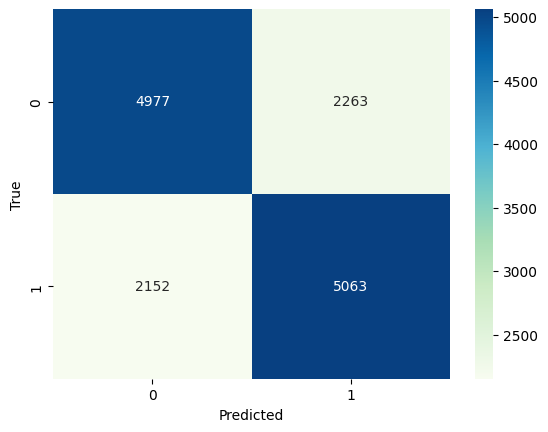

In [22]:
y_pred = random_forest.predict(x_test)

print(f"F1 Score: {f1_score(y_test,y_pred, pos_label= 'positivo')}")
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {recall_score(y_test,y_pred, pos_label='positivo')}")
print(f"Precision Score: {precision_score(y_test,y_pred, pos_label='positivo')}")

tabla=confusion_matrix(y_test, y_pred)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

## Predict de kaggle

Para la predict de kaggle aplicamos el mismo preprocesamiento de datos que hicimos en el de entrnamiento

In [23]:
df_criticas_test = pd.read_csv('./test.csv')
df_test = df_criticas_test.copy()
df_test.head(10)

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."
5,60005,La llegada de Rafa a Euskadi es como ponerse a...
6,60006,El nivel del cine y lo peor la capacidad intel...
7,60007,Es triste ver una película como ésta y escucha...
8,60008,Puedo entender que Torrente I y II y Lo imposi...
9,60009,"-Ahivalohostia, Txomin, qué montón de gente ri..."


In [33]:
df_test['num_palabras'] = df_test['review_es'].str.split().apply(len)

vectorizer = CountVectorizer(vocabulary=palabras)
matriz_caracteristicas_test = vectorizer.fit_transform(df_test['review_es'])

for i, palabra in enumerate(palabras):
    df_test[palabra] = matriz_caracteristicas_test.toarray()[:, i]


_df_test = df_test.drop(columns='ID',inplace=False)
_df_test.drop(columns='review_es',inplace=True)

_df_test.head(10)

,num_palabras,actor,actuacion,algun,aqu,asi,aunqu,años,bastant,bien,...,tip,tod,tom,trabaj,trat,unic,ver,vez,vid,vist
0,909,0,0,0,0,0,2,1,0,1,...,0,11,0,0,0,1,2,0,1,1
1,236,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
2,141,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,354,0,0,0,0,1,1,0,0,2,...,0,2,0,0,0,1,0,0,0,0
4,346,0,0,0,0,1,0,0,0,1,...,0,4,0,0,1,0,2,1,0,0
5,446,0,0,1,0,0,0,0,0,0,...,0,4,0,0,0,1,1,0,0,0
6,113,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,389,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
8,188,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
9,722,1,0,1,0,0,0,0,0,1,...,2,4,0,0,1,1,2,0,0,2


In [34]:
pred_kaggle_rf = random_forest.predict(_df_test)
df_kaggle_rf = pd.DataFrame({'ID': df_test['ID'], 'sentimiento': pred_kaggle_rf})
df_kaggle_rf.head(10)

,ID,sentimiento
0,60000,negativo
1,60001,negativo
2,60002,negativo
3,60003,negativo
4,60004,negativo
5,60005,negativo
6,60006,negativo
7,60007,positivo
8,60008,negativo
9,60009,negativo


In [35]:
df_kaggle_rf.shape[0]

8599

In [36]:
df_kaggle_rf.to_csv('pred_kaggle_ramdom_forest.csv', index=False)

## Guardar Modelo

In [30]:
import joblib
filename = 'Random_Forest.sav'
joblib.dump(random_forest, filename)

['Random_Forest.sav']

# Red Neuronal

In [158]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

#Inicializamos los pesos para las capas
kernel_initializer = tf.keras.initializers.GlorotUniform(seed=42)
bias_initializer = tf.keras.initializers.Zeros()
tf.random.set_seed(42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

red_neuronal = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(x_train.columns),),
                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer),

    keras.layers.Dense(32, activation='relu',
                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer),

    keras.layers.Dense(1, activation='sigmoid',
                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
])

red_neuronal.compile(
  optimizer= 'adam',
  loss='binary_crossentropy',
  metrics=['accuracy','Precision','Recall'])

history = red_neuronal.fit(x_train,y_train_encoded,epochs=10,
                           batch_size=32,
                           verbose=False)

Contruimos una red neuronal con una capa de entrada con 64 neuronas con activacion relu, una capa oculta de 32 neuronas con activacion relu, una capa de salida de una neurana cun activacion sigmond. Elegido de manera a azar

452/452 [==============================] - 1s 2ms/step - loss: 0.5545 - accuracy: 0.7199 - precision: 0.7272 - recall: 0.7023
Perdida: 0.5545145869255066
Acurracy: 0.7198892831802368
Precision: 0.7271813750267029
Recall: 0.7022868990898132
452/452 [==============================] - 1s 1ms/step
f1_score: 0.7145173799619262


Text(50.722222222222214, 0.5, 'True')

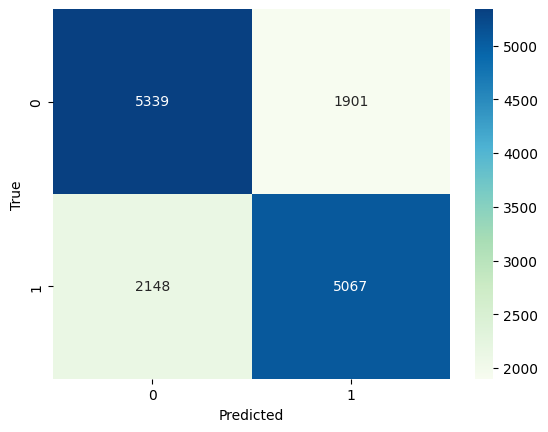

In [162]:
import numpy as np
y_test_onehot = label_encoder.fit_transform(y_test)
loss, accuracy, precision, recall = red_neuronal.evaluate(x_test,y_test_onehot)
print(f"Perdida: {loss}")
print(f"Acurracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

y_pred = red_neuronal.predict(x_test)
y_pred = np.round(y_pred).astype(int)
print(f"f1_score: {f1_score(y_test_onehot,y_pred)}")

tabla = confusion_matrix(y_test_onehot,y_pred)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

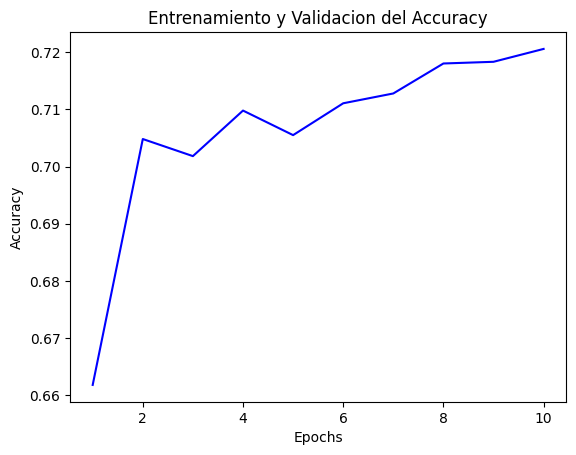

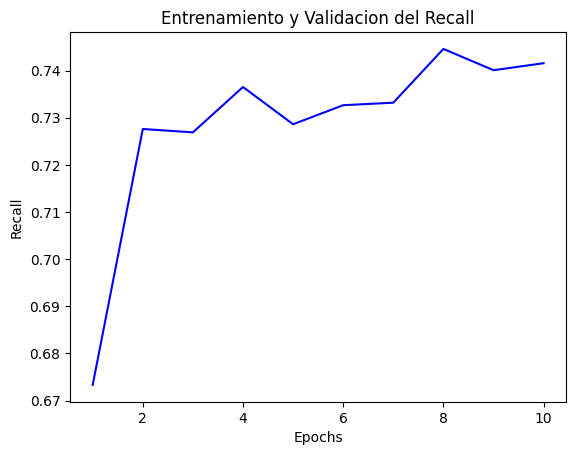

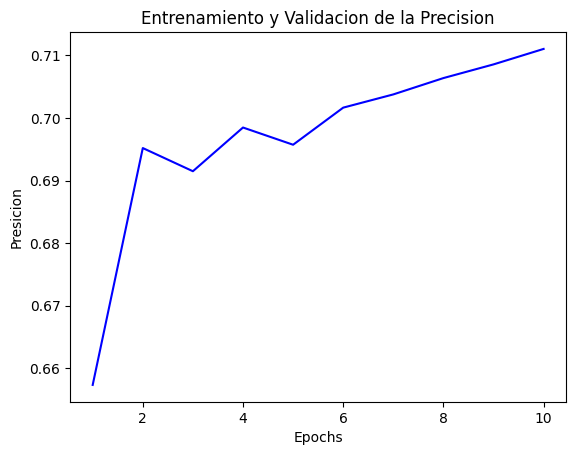

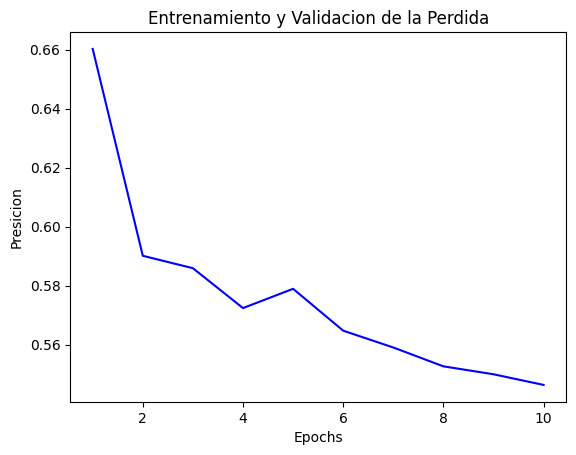

In [41]:
accuracy = history.history['accuracy']
recall = history.history['recall']
presicion = history.history['precision']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, accuracy, 'b', label='Entrenamiento del Accuracy')
plt.title('Entrenamiento y Validacion del Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.plot(epochs, recall, 'b', label='Entrenamiento del Recall')
plt.title('Entrenamiento y Validacion del Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

plt.plot(epochs, presicion, 'b', label='Entrenamiento de la Precision')
plt.title('Entrenamiento y Validacion de la Precision')
plt.xlabel('Epochs')
plt.ylabel('Presicion')
plt.show()

plt.plot(epochs, loss, 'b', label='Entrenamiento de la Perdida')
plt.title('Entrenamiento y Validacion de la Perdida')
plt.xlabel('Epochs')
plt.ylabel('Presicion')
plt.show()

## Busqueda de mejores hiperparametros y arquitectura

Como se ve en los graficos de las metricas en la sucecion de las epocas de la red, hay bastante varinza en el resultado de las metricas a medida que trancurren las epocas. Para mejorar la red decidimos aniadirle dos capas ocutas mas con una regulacion de L2 y un dropout a cada capa y aumentamos la cantidad de epocas

In [261]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

red_neuronal = keras.Sequential([
    keras.layers.Dense(90, activation='relu', input_shape=(len(x_train.columns),),
                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer),

    keras.layers.Dense(126, activation='relu',kernel_regularizer=regularizers.L1L2(l2=0.015),
                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer),

    keras.layers.Dropout(0.16),
#n=125 , l2=0,032
    keras.layers.Dense(125, activation='relu',kernel_regularizer=regularizers.L1L2(l2=0.032),
                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer),
    keras.layers.Dropout(0.15),

    keras.layers.Dense(135, activation='relu',kernel_regularizer=regularizers.L1L2(l2=0.021),
                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer),
    keras.layers.Dropout(0.16),

    keras.layers.Dense(1, activation='sigmoid',
                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
])

#early_stopping = EarlyStopping(monitor='recall',patience=10)
red_neuronal.compile(
  optimizer= Adam(learning_rate=0.004),
  loss='binary_crossentropy',
  metrics=['accuracy','Precision','Recall'])

history = red_neuronal.fit(x_train,y_train_encoded,epochs=42,
                           batch_size=89,
                          # callbacks=[early_stopping],
                           verbose=False)

452/452 [==============================] - 1s 2ms/step - loss: 0.5604 - accuracy: 0.7225 - precision: 0.7204 - recall: 0.7257
Perdida: 0.5603915452957153
Acurracy: 0.7225181460380554
Precision: 0.7204182744026184
Recall: 0.7257103323936462
452/452 [==============================] - 1s 2ms/step
f1_score: 0.7230546157564041


Text(50.722222222222214, 0.5, 'True')

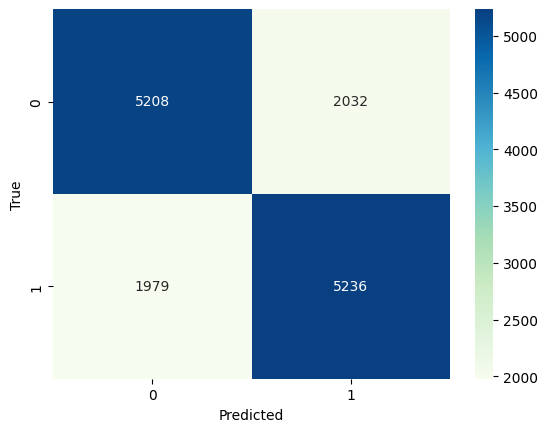

In [264]:
y_test_onehot = label_encoder.fit_transform(y_test)
loss, accuracy, precision, recall = red_neuronal.evaluate(x_test,y_test_onehot)
print(f"Perdida: {loss}")
print(f"Acurracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

y_pred = red_neuronal.predict(x_test)
y_pred = np.round(y_pred).astype(int)
print(f"f1_score: {f1_score(y_test_onehot,y_pred)}")

tabla = confusion_matrix(y_test_onehot,y_pred)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

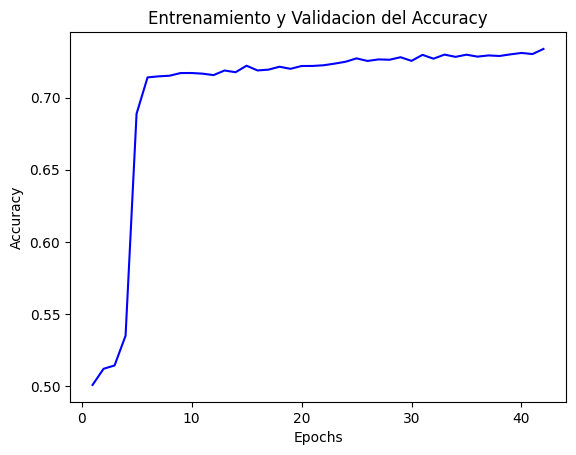

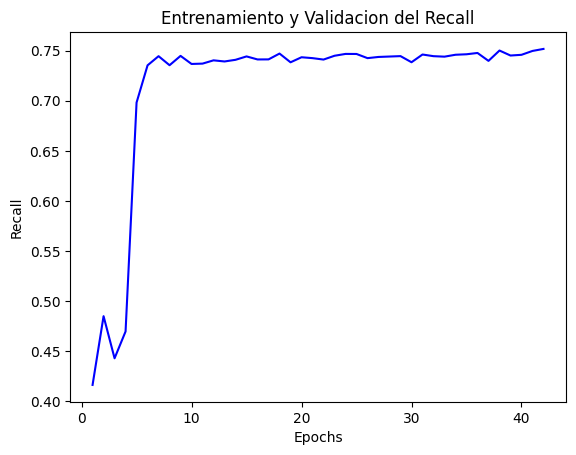

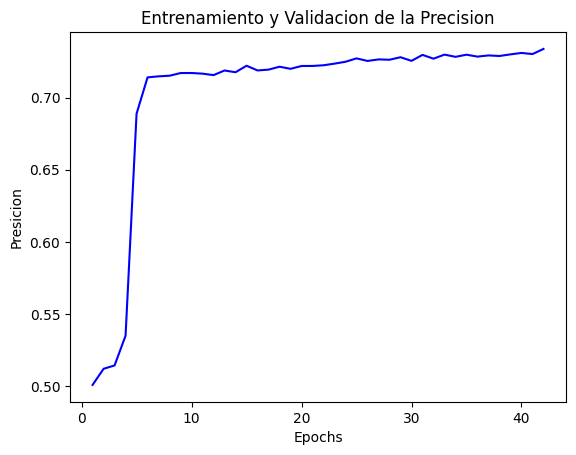

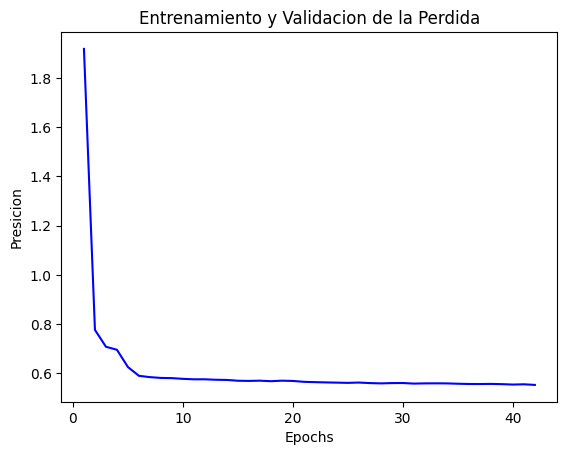

In [263]:
accuracy = history.history['accuracy']
recall = history.history['recall']
presicion = history.history['precision']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, accuracy, 'b', label='Entrenamiento del Accuracy')
plt.title('Entrenamiento y Validacion del Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.plot(epochs, recall, 'b', label='Entrenamiento del Recall')
plt.title('Entrenamiento y Validacion del Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

plt.plot(epochs, accuracy, 'b', label='Entrenamiento de la Precision')
plt.title('Entrenamiento y Validacion de la Precision')
plt.xlabel('Epochs')
plt.ylabel('Presicion')
plt.show()


plt.plot(epochs, loss, 'b', label='Entrenamiento de la Perdida')
plt.title('Entrenamiento y Validacion de la Perdida')
plt.xlabel('Epochs')
plt.ylabel('Presicion')
plt.show()

De esta manera las metricas son mas estables

In [276]:
from tensorflow.keras.optimizers import Adam

red_neuronal = keras.Sequential([
    keras.layers.Dense(90, activation='relu', input_shape=(len(x_train.columns),),
                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer),

    keras.layers.Dense(87, activation='relu',
                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer),

    keras.layers.Dropout(0.20),

    keras.layers.Dense(75, activation='relu',
                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer),
    keras.layers.Dropout(0.15),

    keras.layers.Dense(1, activation='sigmoid',
                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
])

red_neuronal.compile(
  optimizer= Adam(learning_rate=0.003),
  loss='binary_crossentropy',
  metrics=['accuracy','Precision','Recall'])

history = red_neuronal.fit(x_train,y_train_encoded,epochs=12,
                           batch_size=36,
                           verbose=False)

452/452 [==============================] - 4s 2ms/step - loss: 0.5652 - accuracy: 0.7208 - precision: 0.7126 - recall: 0.7383
Perdida: 0.5651611685752869
Acurracy: 0.7207886576652527
Precision: 0.7126421332359314
Recall: 0.738322913646698
452/452 [==============================] - 1s 2ms/step
f1_score: 0.7252552756977535


Text(50.722222222222214, 0.5, 'True')

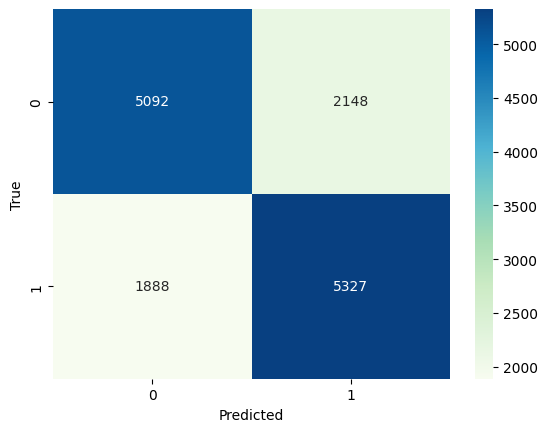

In [277]:
y_test_onehot = label_encoder.fit_transform(y_test)
loss, accuracy, precision, recall = red_neuronal.evaluate(x_test,y_test_onehot)
print(f"Perdida: {loss}")
print(f"Acurracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

y_pred = red_neuronal.predict(x_test)
y_pred = np.round(y_pred).astype(int)
print(f"f1_score: {f1_score(y_test_onehot,y_pred)}")

tabla = confusion_matrix(y_test_onehot,y_pred)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

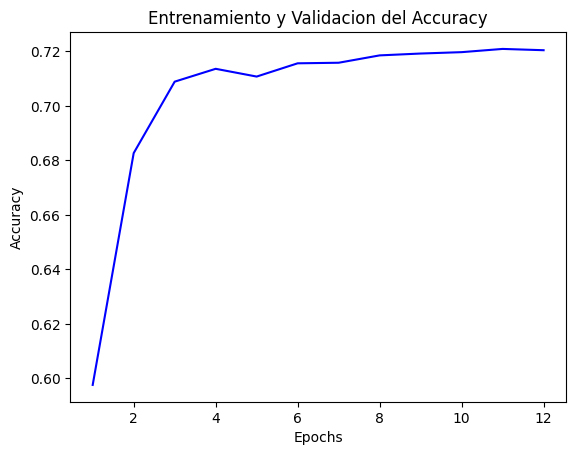

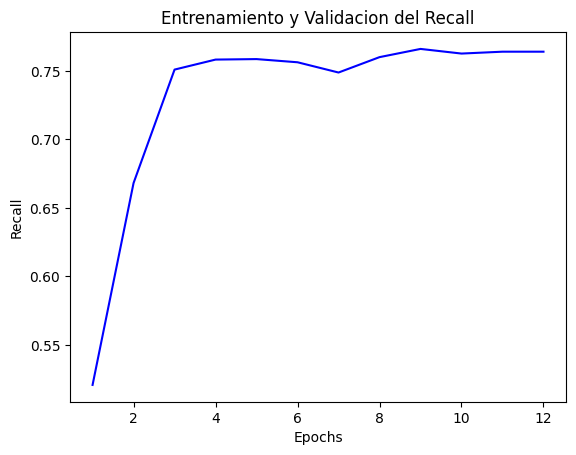

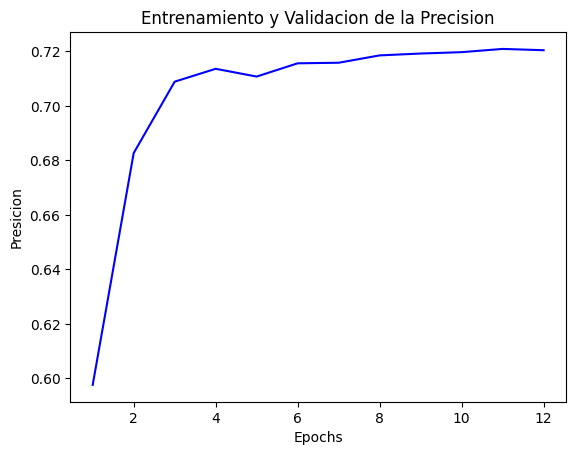

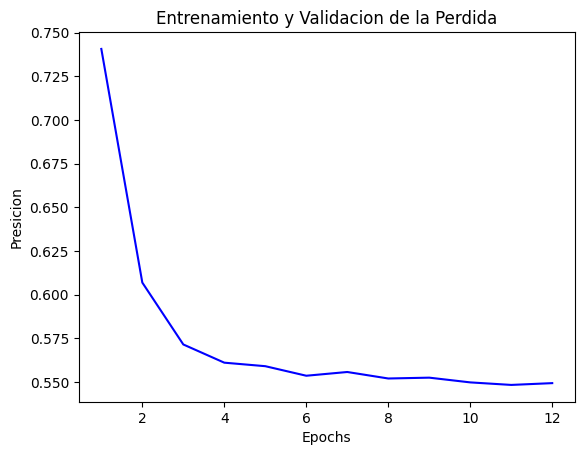

In [278]:
accuracy = history.history['accuracy']
recall = history.history['recall']
presicion = history.history['precision']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, accuracy, 'b', label='Entrenamiento del Accuracy')
plt.title('Entrenamiento y Validacion del Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.plot(epochs, recall, 'b', label='Entrenamiento del Recall')
plt.title('Entrenamiento y Validacion del Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

plt.plot(epochs, accuracy, 'b', label='Entrenamiento de la Precision')
plt.title('Entrenamiento y Validacion de la Precision')
plt.xlabel('Epochs')
plt.ylabel('Presicion')
plt.show()


plt.plot(epochs, loss, 'b', label='Entrenamiento de la Perdida')
plt.title('Entrenamiento y Validacion de la Perdida')
plt.xlabel('Epochs')
plt.ylabel('Presicion')
plt.show()

Este ultimo modelo de red neuronal fue la que tuvo mejor prediccion en kaggle

## Predict de Kaggle

Para el predict de kaggle del modelo de la red neuronal hacemos el mismo preprocesamiento de datos que hicimos en el entrenamiento

In [279]:
df_criticas_test = pd.read_csv('./test.csv')
df_test = df_criticas_test.copy()

stemmer = SnowballStemmer('spanish')

def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

df_test['review_es'] = df_test['review_es'].apply(stem_sentence)
df_test.head(10)

,ID,review_es
0,60000,la mayor virtud de esta pelicul es su existenc...
1,60001,"no soy un expert cinefil , per poc vec me hab ..."
2,60002,si no eres un incondicional del humor estil te...
3,60003,"no se que esta pas , si la gent se dej llev po..."
4,60004,"per cuand amanec , y me qued sol , sient en el..."
5,60005,la lleg de raf a euskadi es com pon a ver 8 ap...
6,60006,el nivel del cin y lo peor la capac intelectua...
7,60007,es trist ver una pelicul com esta y escuch a t...
8,60008,pued entend que torrent i y ii y lo impos fuer...
9,60009,"-ahivalohosti , txomin , que monton de gent ri..."


In [280]:
df_test['num_palabras'] = df_test['review_es'].str.split().apply(len)

vectorizer = CountVectorizer(vocabulary=palabras)
matriz_caracteristicas_test = vectorizer.fit_transform(df_test['review_es'])

for i, palabra in enumerate(palabras):
    df_test[palabra] = matriz_caracteristicas_test.toarray()[:, i]


_df_test = df_test.drop(columns='ID',inplace=False)
_df_test.drop(columns='review_es',inplace=True)

_df_test.head(10)

,num_palabras,actor,actuacion,algun,aqu,asi,aunqu,años,bastant,bien,...,tip,tod,tom,trabaj,trat,unic,ver,vez,vid,vist
0,909,0,0,0,0,0,2,1,0,1,...,0,11,0,0,0,1,2,0,1,1
1,236,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
2,141,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,354,0,0,0,0,1,1,0,0,2,...,0,2,0,0,0,1,0,0,0,0
4,346,0,0,0,0,1,0,0,0,1,...,0,4,0,0,1,0,2,1,0,0
5,446,0,0,1,0,0,0,0,0,0,...,0,4,0,0,0,1,1,0,0,0
6,113,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,389,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
8,188,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
9,722,1,0,1,0,0,0,0,0,1,...,2,4,0,0,1,1,2,0,0,2


In [281]:
y_pred_kaggle = red_neuronal.predict(_df_test)
y_pred_kaggle = np.round(y_pred_kaggle).astype(int)
y_pred_encoded_kaggle = label_encoder.inverse_transform(y_pred_kaggle)
y_pred_encoded_kaggle

269/269 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['positivo', 'negativo', 'negativo', ..., 'negativo', 'negativo',
       'negativo'], dtype=object)

In [282]:
df_kaggle_red = pd.DataFrame({'ID': df_test['ID'], 'sentimiento': y_pred_encoded_kaggle})
df_kaggle_red.head(10)

,ID,sentimiento
0,60000,positivo
1,60001,negativo
2,60002,negativo
3,60003,negativo
4,60004,negativo
5,60005,negativo
6,60006,negativo
7,60007,positivo
8,60008,negativo
9,60009,positivo


In [283]:
df_kaggle_red.shape[0]

8599

In [284]:
df_kaggle_red.to_csv('pred_kaggle_red_neuronal.csv', index=False)

## Guardar modelo

In [285]:
import joblib
filename = 'Red_Neuronal.sav'
joblib.dump(red_neuronal, filename)

['Red_Neuronal.sav']